In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris

In [14]:
import pandas as pd

In [15]:
iris = load_iris()

In [16]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
# design matrix
X = iris.data

In [19]:
# targets
y = iris.target

In [20]:
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['label'] = pd.Series(iris.target_names[y], dtype='category')

In [21]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [23]:
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

<Axes: xlabel='petal length', ylabel='petal width'>

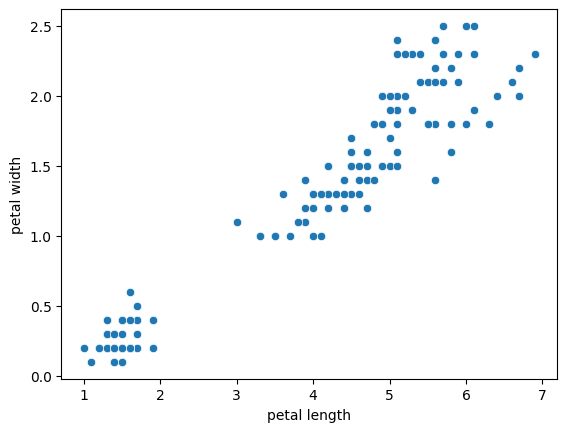

In [24]:
sns.scatterplot(data=df, x='petal length', y='petal width')

In [25]:
palette = {'setosa': 'orange', 'versicolor': 'green', 'virginica': 'purple'}

<Axes: xlabel='petal length', ylabel='petal width'>

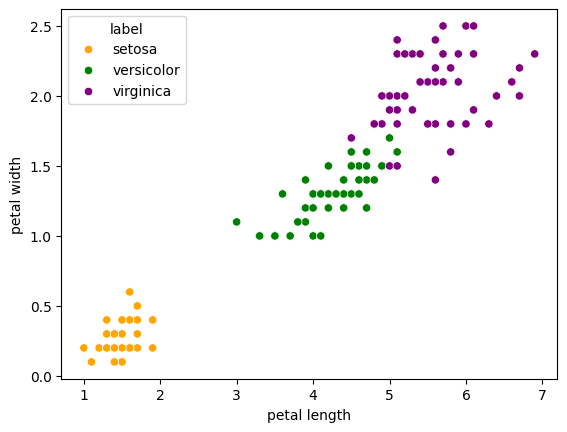

In [26]:
sns.scatterplot(data=df, x='petal length', y='petal width', hue='label', palette=palette)

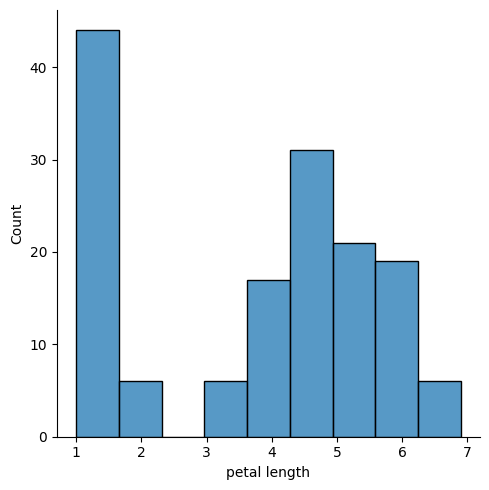

In [27]:
sns.displot(data=df, x='petal length')

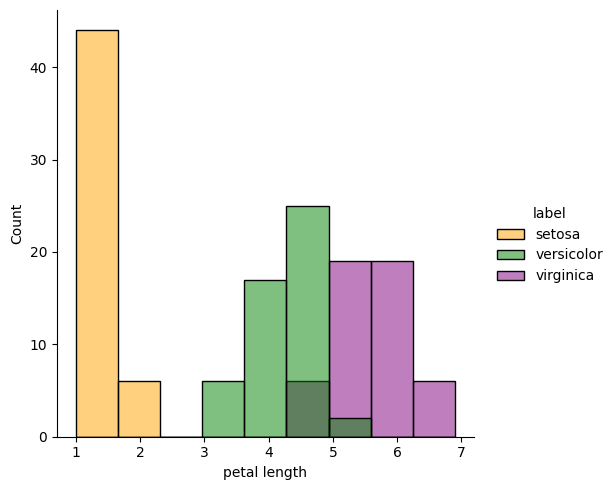

In [28]:
sns.displot(data=df, x='petal length', hue='label', palette=palette)

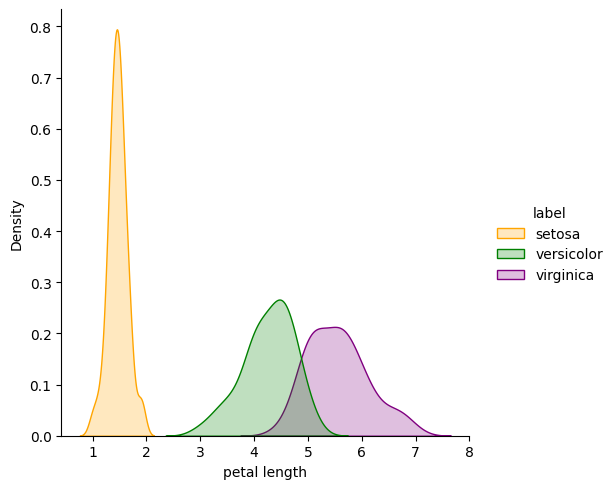

In [29]:
sns.displot(data=df, x='petal length', hue='label', palette=palette, kind='kde', fill=True)

C:\Users\My PC\AppData\Local\Temp\ipykernel_27856\4220320119.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.displot(data=df, x='petal length', palette=palette, kind='kde', fill=True)


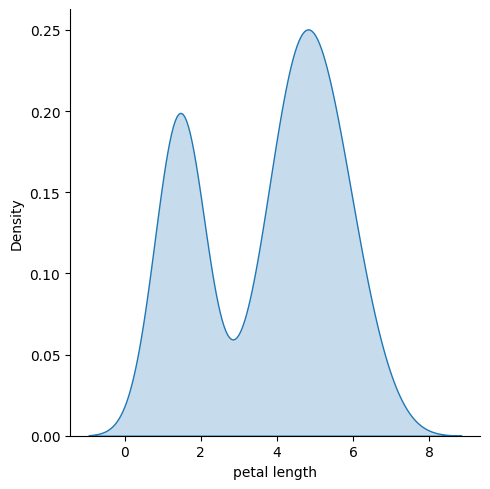

In [30]:
sns.displot(data=df, x='petal length', palette=palette, kind='kde', fill=True)

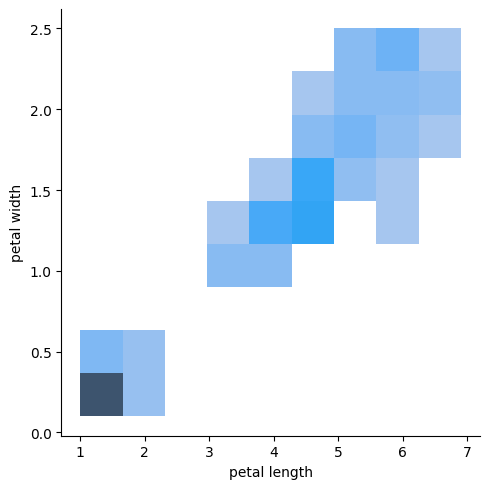

In [31]:
sns.displot(data=df, x='petal length', y='petal width')

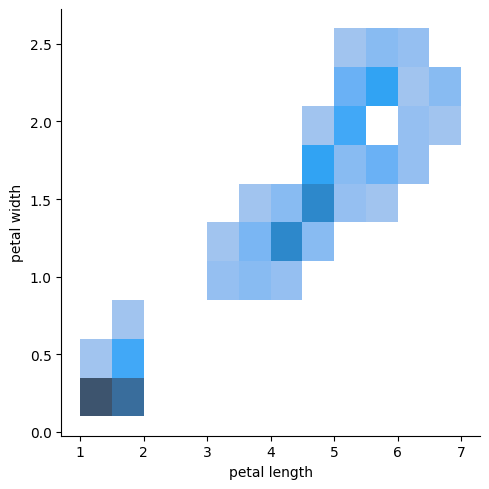

In [32]:
sns.displot(data=df, x='petal length', y='petal width', binwidth=(0.5, 0.25))

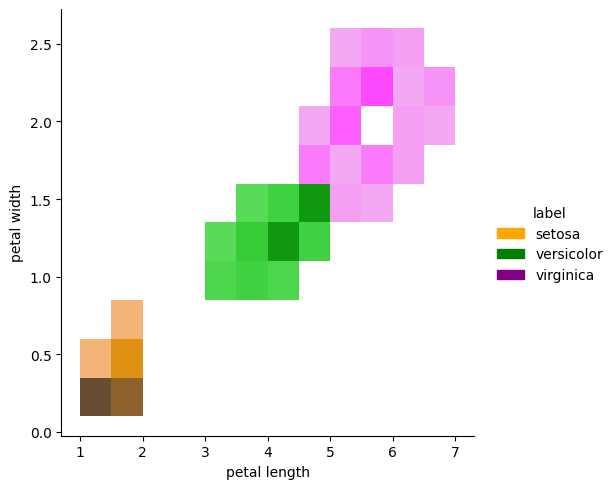

In [33]:
sns.displot(data=df, x='petal length', y='petal width', binwidth=(0.5, 0.25), hue='label', palette=palette)

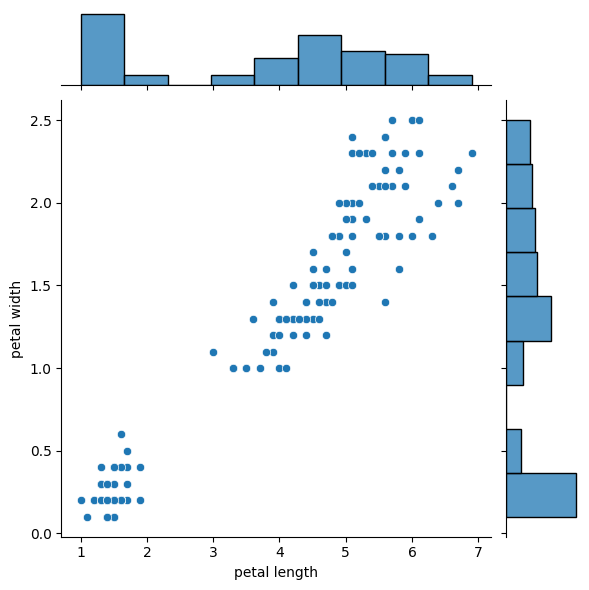

In [34]:
sns.jointplot(data=df, x='petal length', y='petal width')

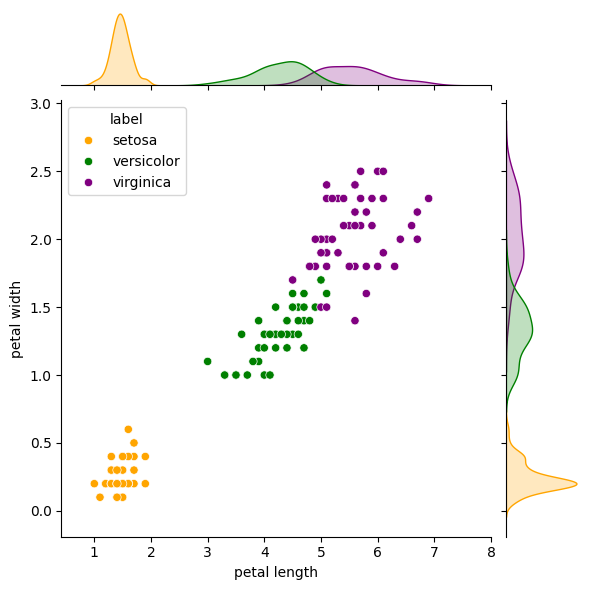

In [35]:
sns.jointplot(data=df, x='petal length', y='petal width', hue='label', palette=palette)

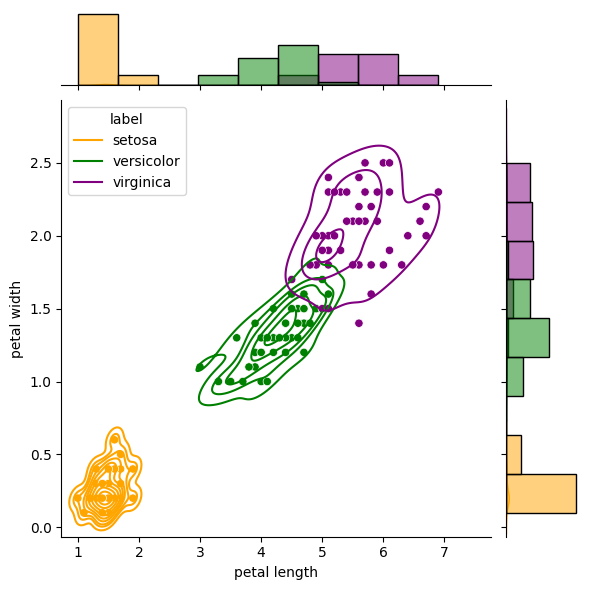

In [36]:
g = sns.jointplot(data=df, x='petal length', y='petal width', hue='label', palette=palette)
g.plot_joint(sns.kdeplot)
g.plot_marginals(sns.histplot)

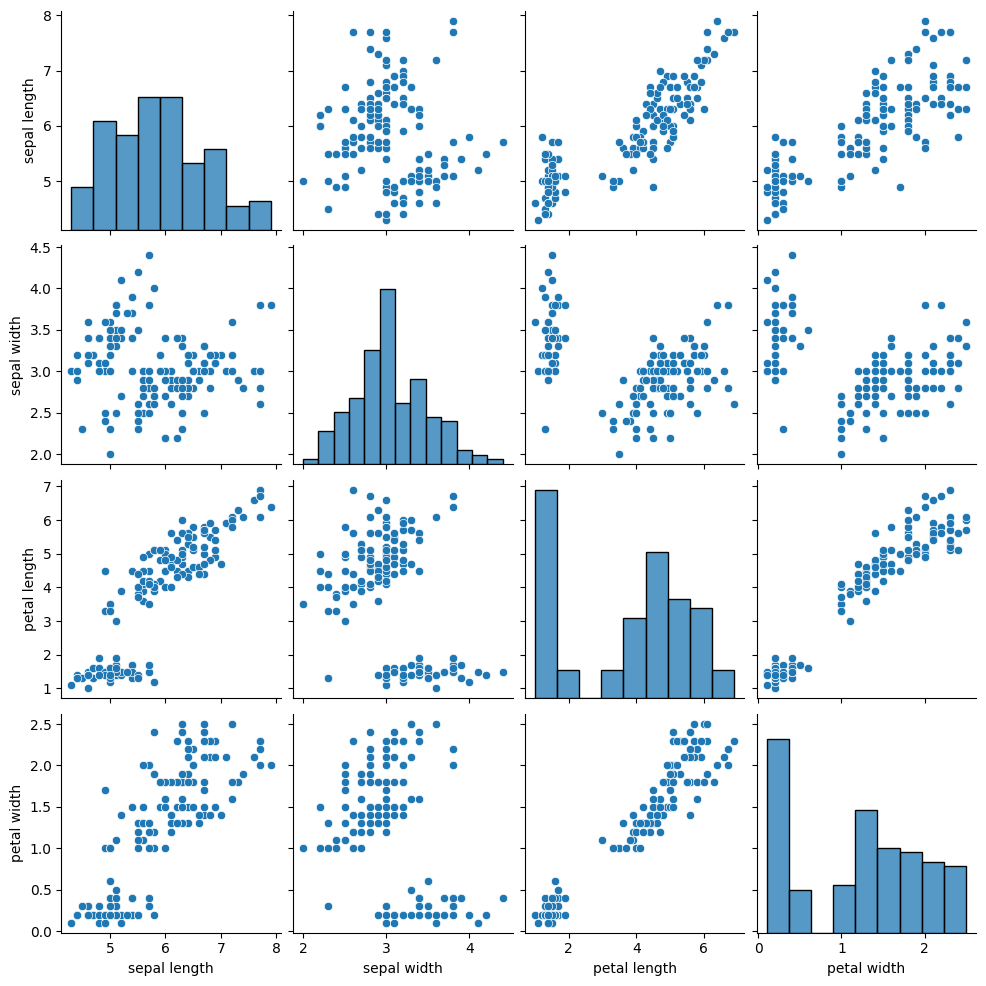

In [37]:
sns.pairplot(data=df, vars=df.columns[0:4])

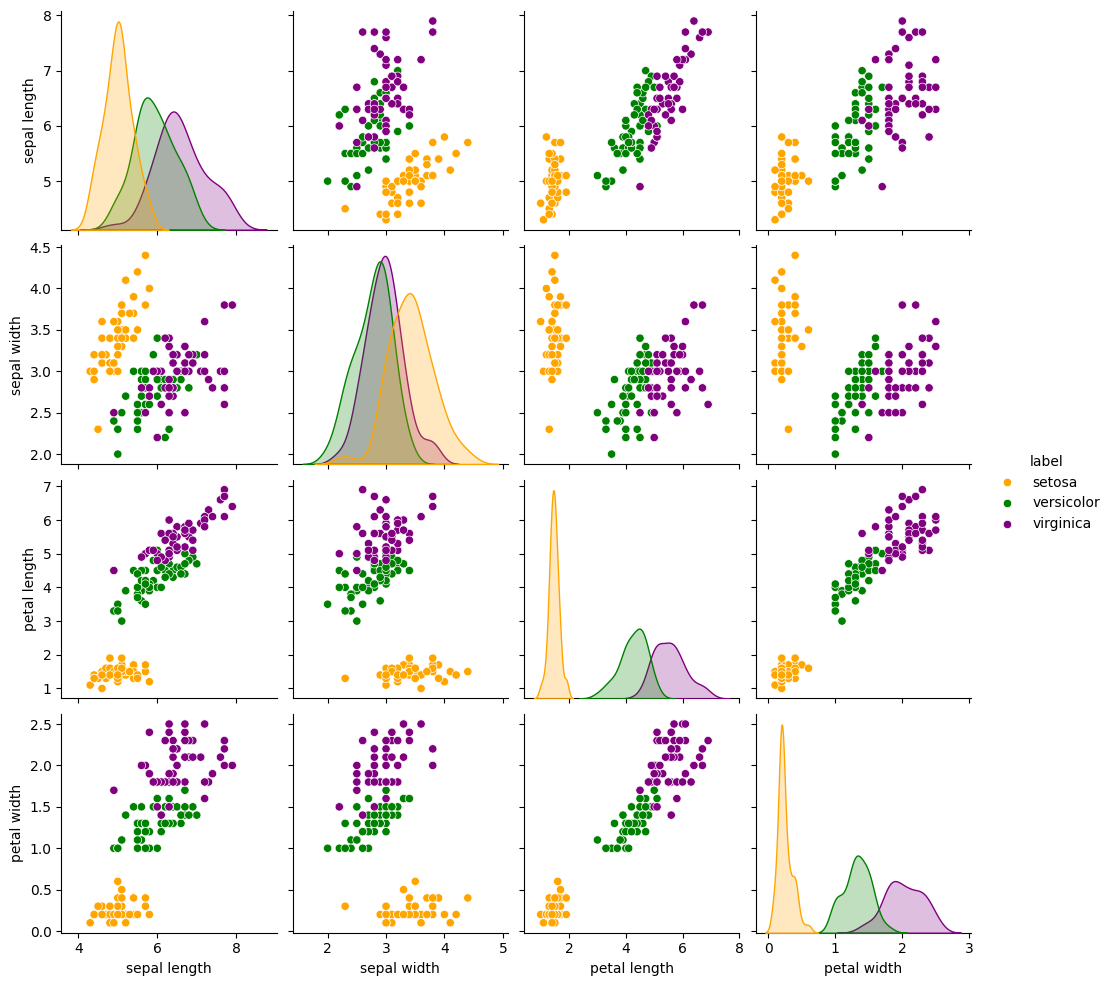

In [40]:
sns.pairplot(data=df, vars=df.columns[0:4], hue='label', palette=palette)
plt.savefig('iris.pdf')

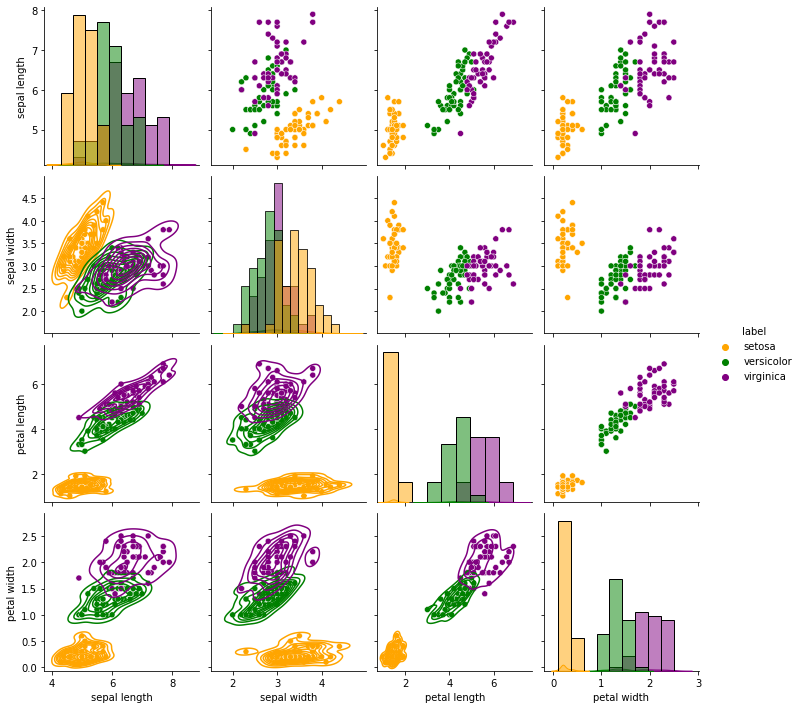

In [ ]:
g = sns.pairplot(data=df, vars=df.columns[0:4], hue='label', palette=palette)
g.map_diag(sns.histplot)
g.map_lower(sns.kdeplot)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(max_depth=2, random_state=42)
model.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

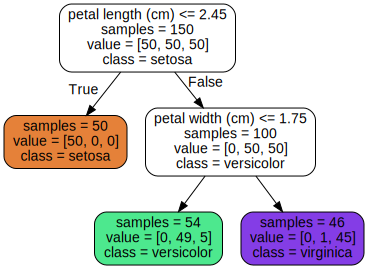

In [ ]:
export_graphviz(model, out_file='iris.dot', feature_names=iris.feature_names, class_names=iris.target_names, impurity=False,
                filled=True, rounded=True)
Source.from_file('iris.dot')

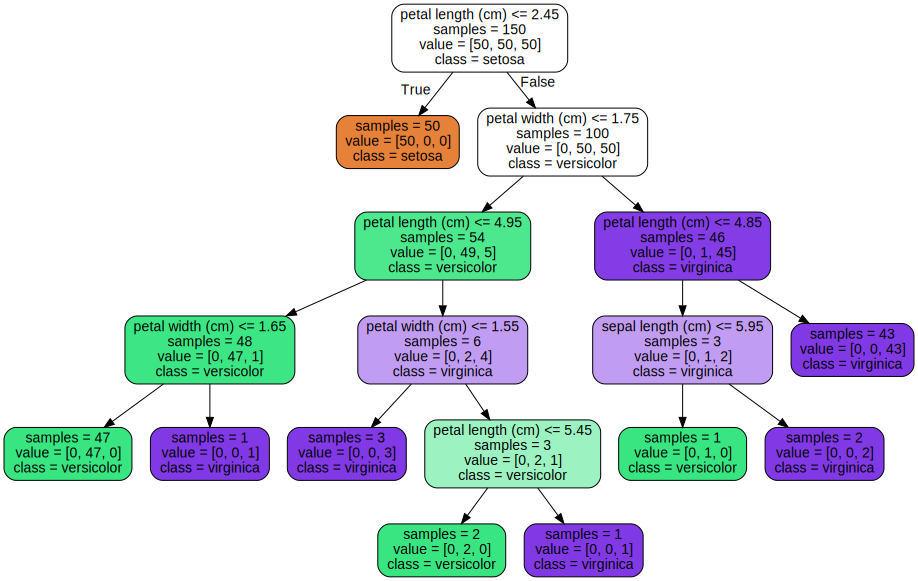

In [ ]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)
export_graphviz(model, out_file='iris.dot', feature_names=iris.feature_names, class_names=iris.target_names, impurity=False,
                filled=True, rounded=True)
Source.from_file('iris.dot')

# EDA for penguins dataset

## 1. Load dataset

In [159]:
penguins = sns.load_dataset('penguins')

In [43]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


## 2. EDA

In [47]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [48]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [49]:
penguins.isna().sum()/len(penguins)

species              0.000000
island               0.000000
bill_length_mm       0.005814
bill_depth_mm        0.005814
flipper_length_mm    0.005814
body_mass_g          0.005814
sex                  0.031977
dtype: float64

In [52]:
numeric_cols = penguins.select_dtypes(['float64']).columns.to_list()
numeric_cols

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [53]:
categorical_cols = [col for col in penguins.columns if col not in numeric_cols]
categorical_cols

['species', 'island', 'sex']

##### This dataset doesn't specify which one is label, I would choose species as label to classify

In [55]:
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

## 3. Visualization

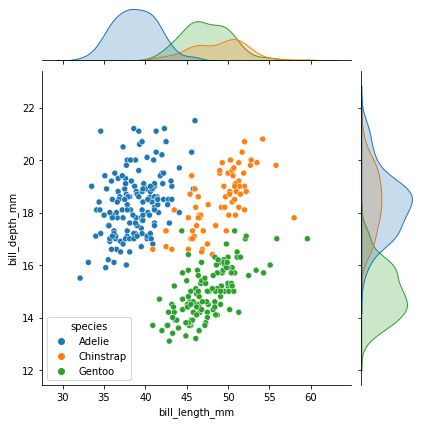

In [ ]:
sns.jointplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species')

In [57]:
penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [71]:
nan_cols = [col for col in penguins.columns if penguins[col].isna().any()]
nan_cols

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

In [81]:
penguins['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [89]:
palette_2 = {'Adelie': 'red', 'Gentoo': 'green', 'Chinstrap': 'blue'}

### 3.1 Visualize each numeric features

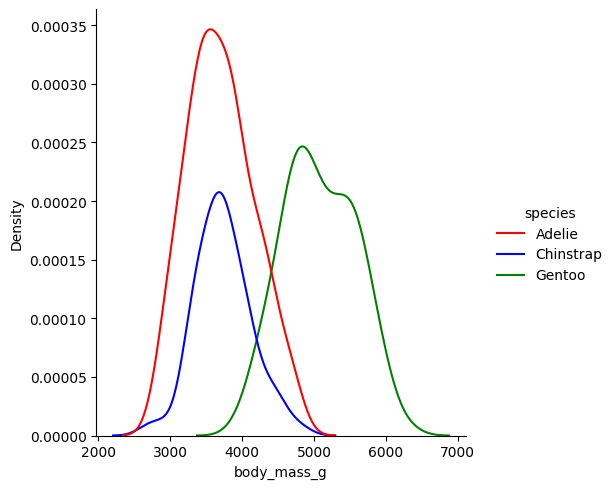

In [180]:
sns.displot(data=penguins, x='body_mass_g', hue='species', palette=palette_2, kind='kde')

Mass overlap between Adelie and Chinstrap - standalone not good

<Axes: xlabel='body_mass_g', ylabel='Density'>

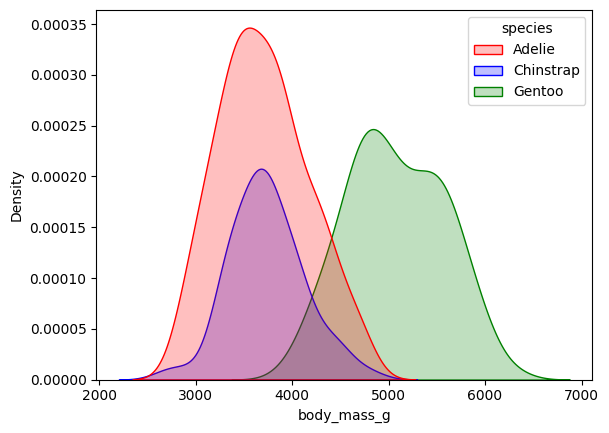

In [146]:
sns.kdeplot(data=penguins, x='body_mass_g', hue='species', palette=palette_2, fill=True) 

<Axes: xlabel='species', ylabel='body_mass_g'>

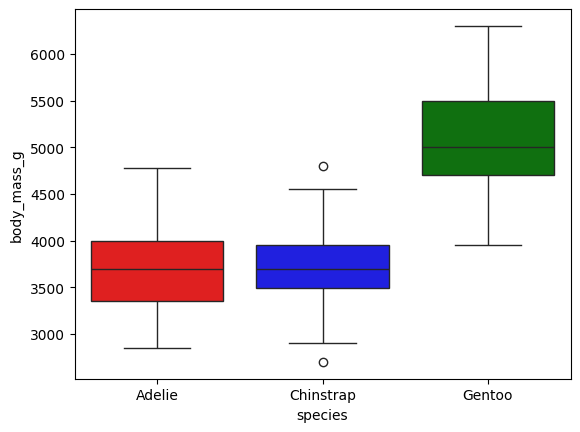

In [149]:
sns.boxplot(data=penguins, x='species', y='body_mass_g', hue='species', palette=palette_2)

The median of each species is different - fillna with different median value

<Axes: xlabel='species', ylabel='bill_length_mm'>

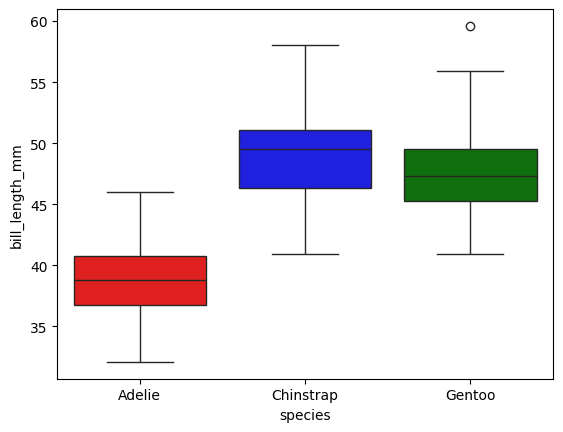

In [172]:
sns.boxplot(data=penguins, x='species', y='bill_length_mm', hue='species', palette=palette_2)

Different median value in bill_lenth_mm column too

But, let's decide whether to use mean or median to fill

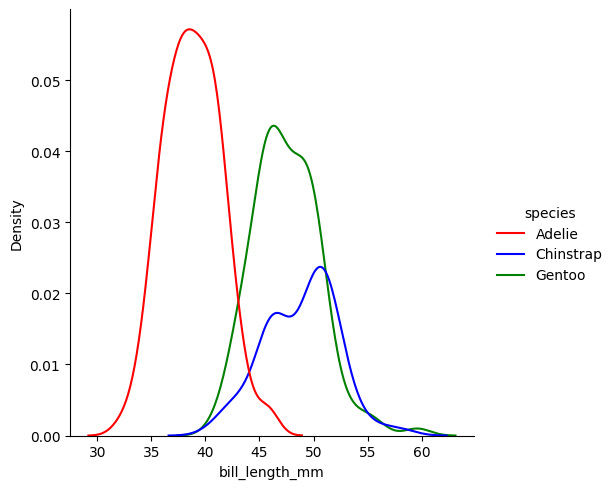

In [177]:
sns.displot(data=penguins, x='bill_length_mm', hue='species', palette=palette_2, kind='kde')

This feature (bill_length_mm) standalone is not good to classify 3 species because overlap between Chinstrap and Gentoo

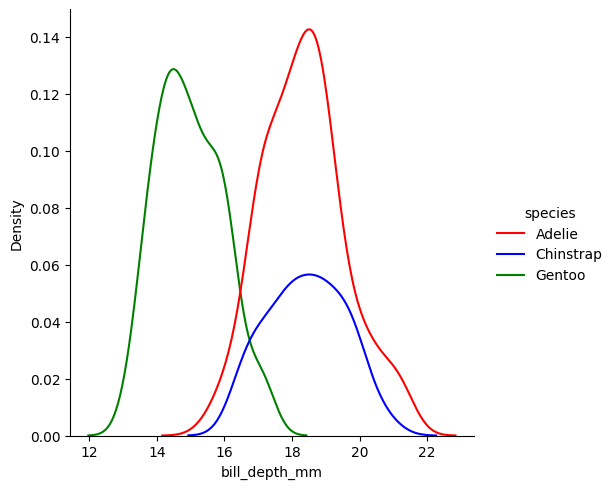

In [181]:
sns.displot(data=penguins, x='bill_depth_mm', hue='species', palette=palette_2, kind='kde')

Mass overlap too

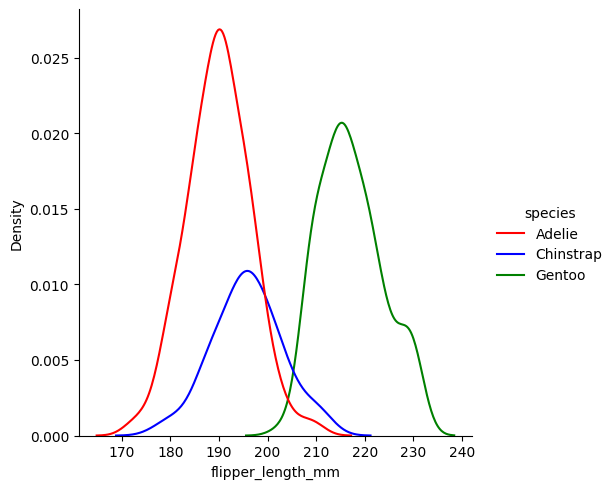

In [182]:
sns.displot(data=penguins, x='flipper_length_mm', hue='species', palette=palette_2, kind='kde')

4 numeric cols standalone not good at distinguish 3 species

### 3.2 Visualize each categorical features

<Axes: xlabel='species', ylabel='count'>

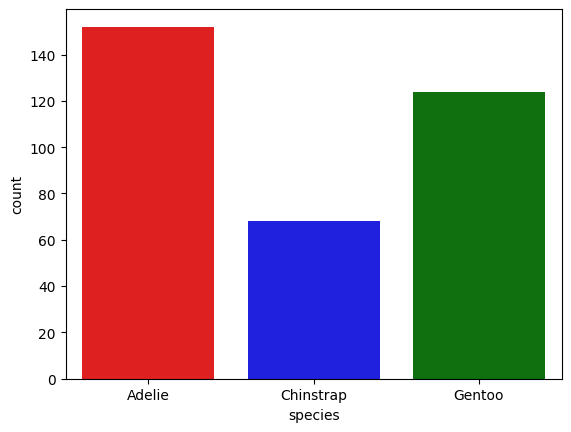

In [106]:
sns.countplot(data=penguins, x='species', hue='species', palette=palette_2)

<Axes: xlabel='island', ylabel='Count'>

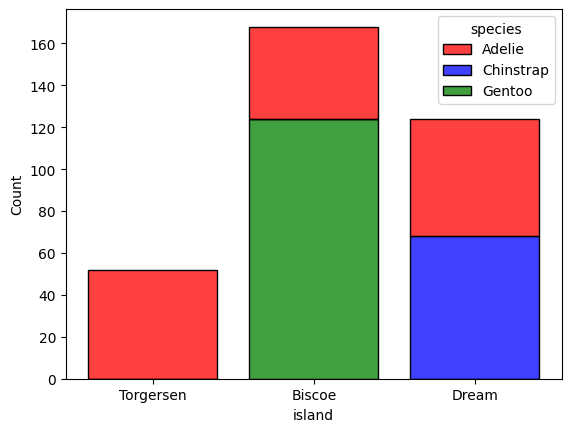

In [110]:
sns.histplot(data=penguins, x='island', hue='species', multiple='stack', palette=palette_2, shrink=.8)

Show no overlap - 120 Gentoo focus only in Biscoe island, nearly 65-70 Chinstrap focus only on Dream island

### 3.3 Bivariate Analysis

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

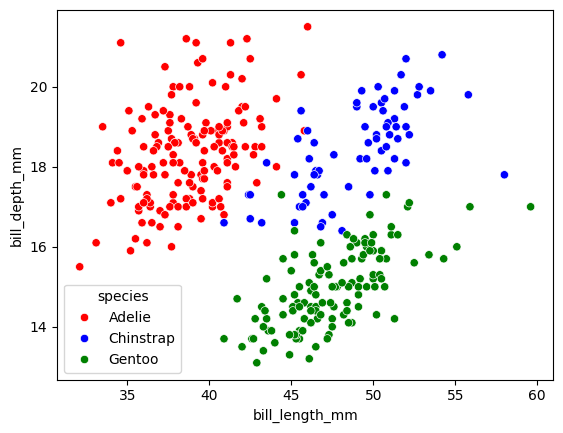

In [113]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='bill_depth_mm', hue='species', palette=palette_2)

<Axes: xlabel='bill_length_mm', ylabel='body_mass_g'>

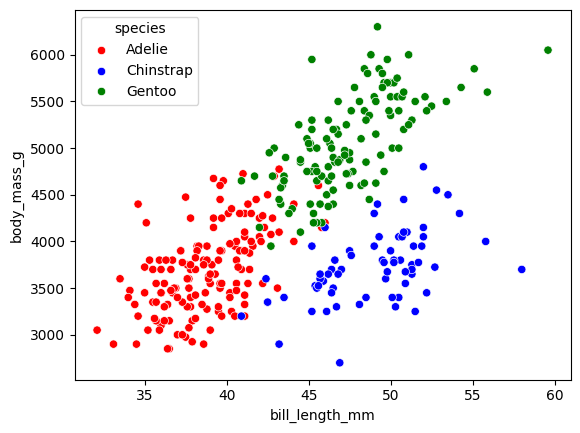

In [115]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='body_mass_g', hue='species', palette=palette_2)

<Axes: xlabel='bill_length_mm', ylabel='flipper_length_mm'>

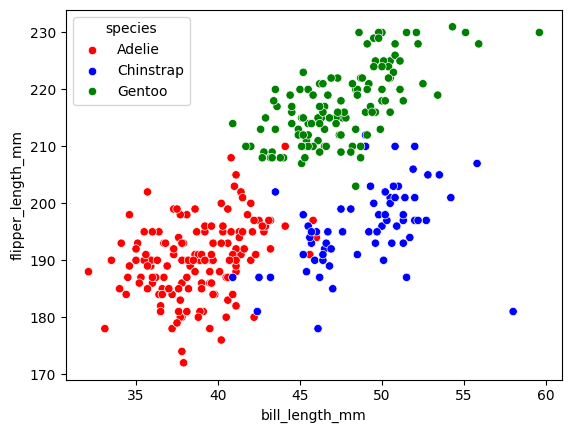

In [116]:
sns.scatterplot(data=penguins, x='bill_length_mm', y='flipper_length_mm', hue='species', palette=palette_2)

These first 3 pairs of feature show hardly no overlap => they're good to distinguish between 3 species

<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

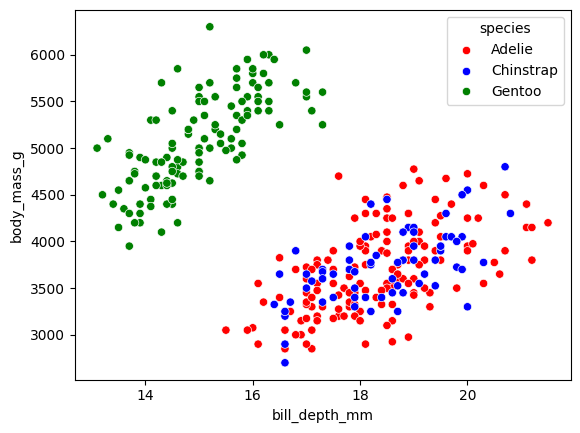

In [117]:
sns.scatterplot(data=penguins, x='bill_depth_mm', y='body_mass_g', hue='species', palette=palette_2)

Mass overlap between Chinstrap and Adelie

<Axes: xlabel='bill_depth_mm', ylabel='flipper_length_mm'>

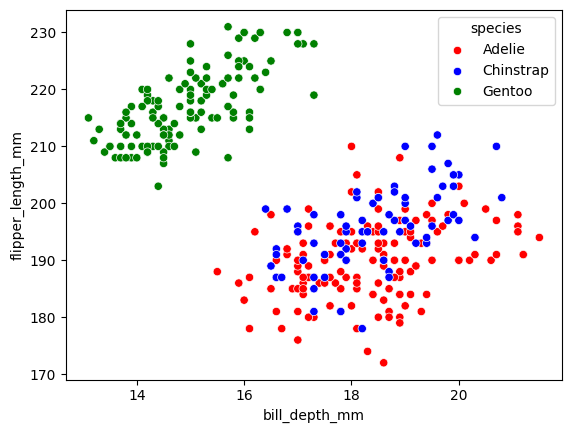

In [121]:
sns.scatterplot(data=penguins, x='bill_depth_mm', y='flipper_length_mm', hue='species', palette=palette_2)

Bad, massive overlap

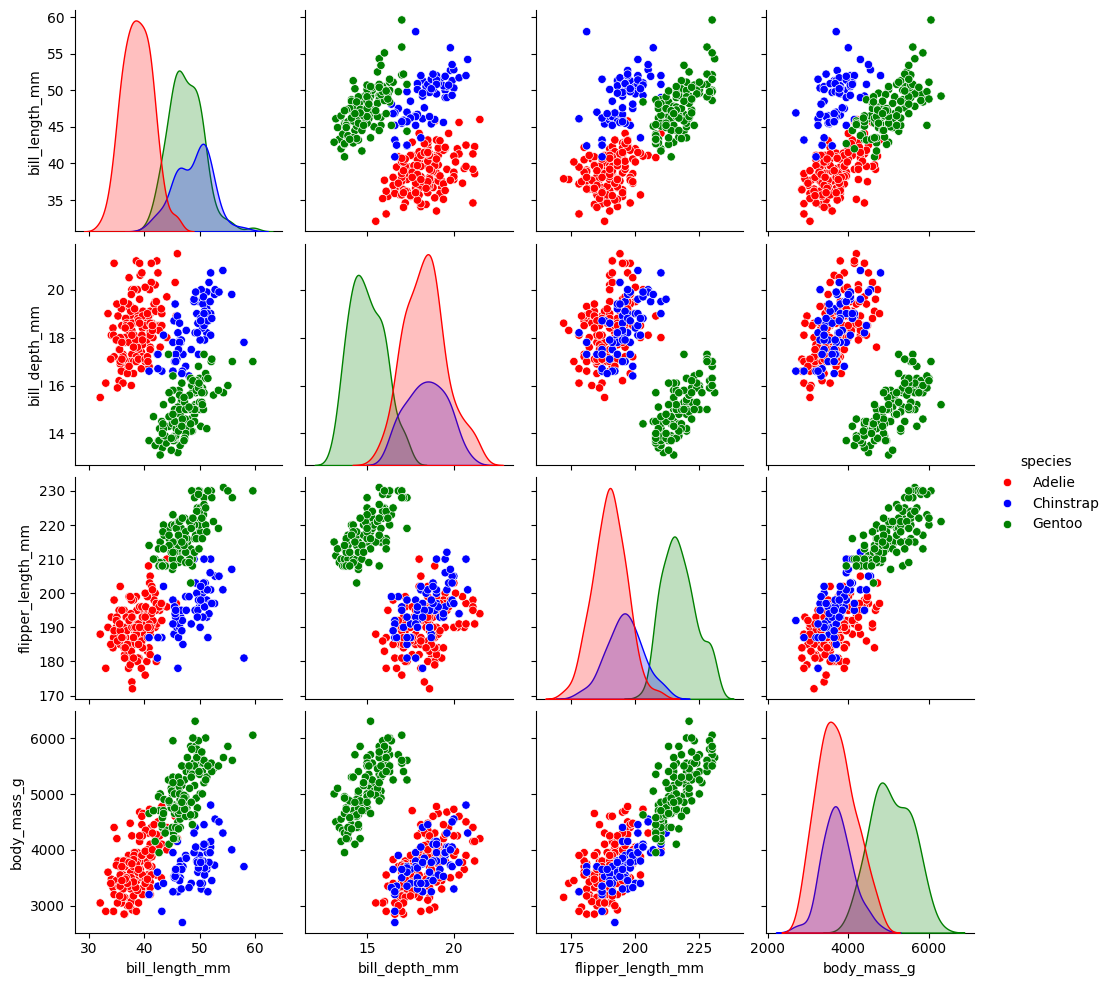

In [128]:
sns.pairplot(data=penguins, vars=numeric_cols, hue='species', palette=palette_2)

<Axes: xlabel='species', ylabel='count'>

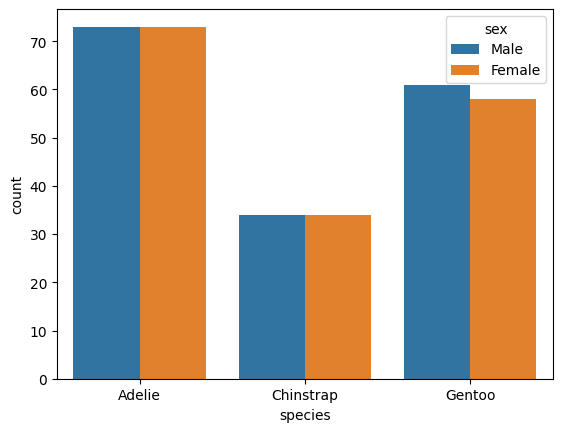

In [141]:
sns.countplot(data=penguins, x='species', hue='sex')

=> Can fillna with mode with no hesitation, male and female distribution are equal

### 3.5 Fillna Strategy

In [158]:
from sklearn.model_selection import train_test_split

X = penguins.drop(columns=['species'])
y = penguins['species']

### Phan Duc Anh - 23520071

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=23520071) 

In [191]:
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [199]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

In [137]:
nan_cols

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']

In [183]:
# Since 'sex' is categorical cols, fill with mode
# All other column can fill with median value - appropriate for numerical columns

In [189]:
categorical_cols.remove('species')
categorical_cols

['island', 'sex']

In [185]:
penguins['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [186]:
penguins['sex'].value_counts()

sex
Male      168
Female    165
Name: count, dtype: int64

Value count of every categorical columns is small - using one hot encoding is best, label encoding for target column (species)

In [160]:
penguins.isna().sum()/len(penguins)

species              0.000000
island               0.000000
bill_length_mm       0.005814
bill_depth_mm        0.005814
flipper_length_mm    0.005814
body_mass_g          0.005814
sex                  0.031977
dtype: float64

In [195]:
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median'))
])

In [210]:
categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder())
])

In [213]:
preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numeric_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

In [201]:
from sklearn.tree import DecisionTreeClassifier

In [215]:
full_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=23520071))
])

In [216]:
full_pipeline.fit(X_train, y_train_encoded)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [218]:
y_pred = full_pipeline.predict(X_test)
accuracy = accuracy_score(y_test_encoded, y_pred)
accuracy

0.9807692307692307